# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [3]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [4]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [5]:
today_string

'2024-03-04'

In [6]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(17, 83, 20)

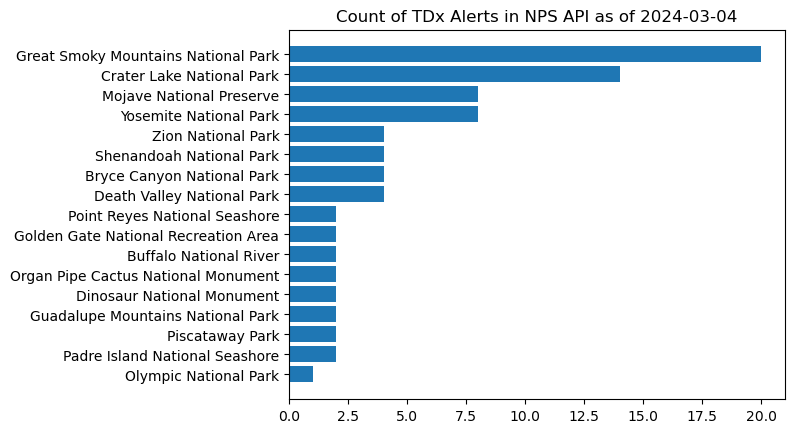

In [7]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_12412\777992271.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_12412\777992271.py:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


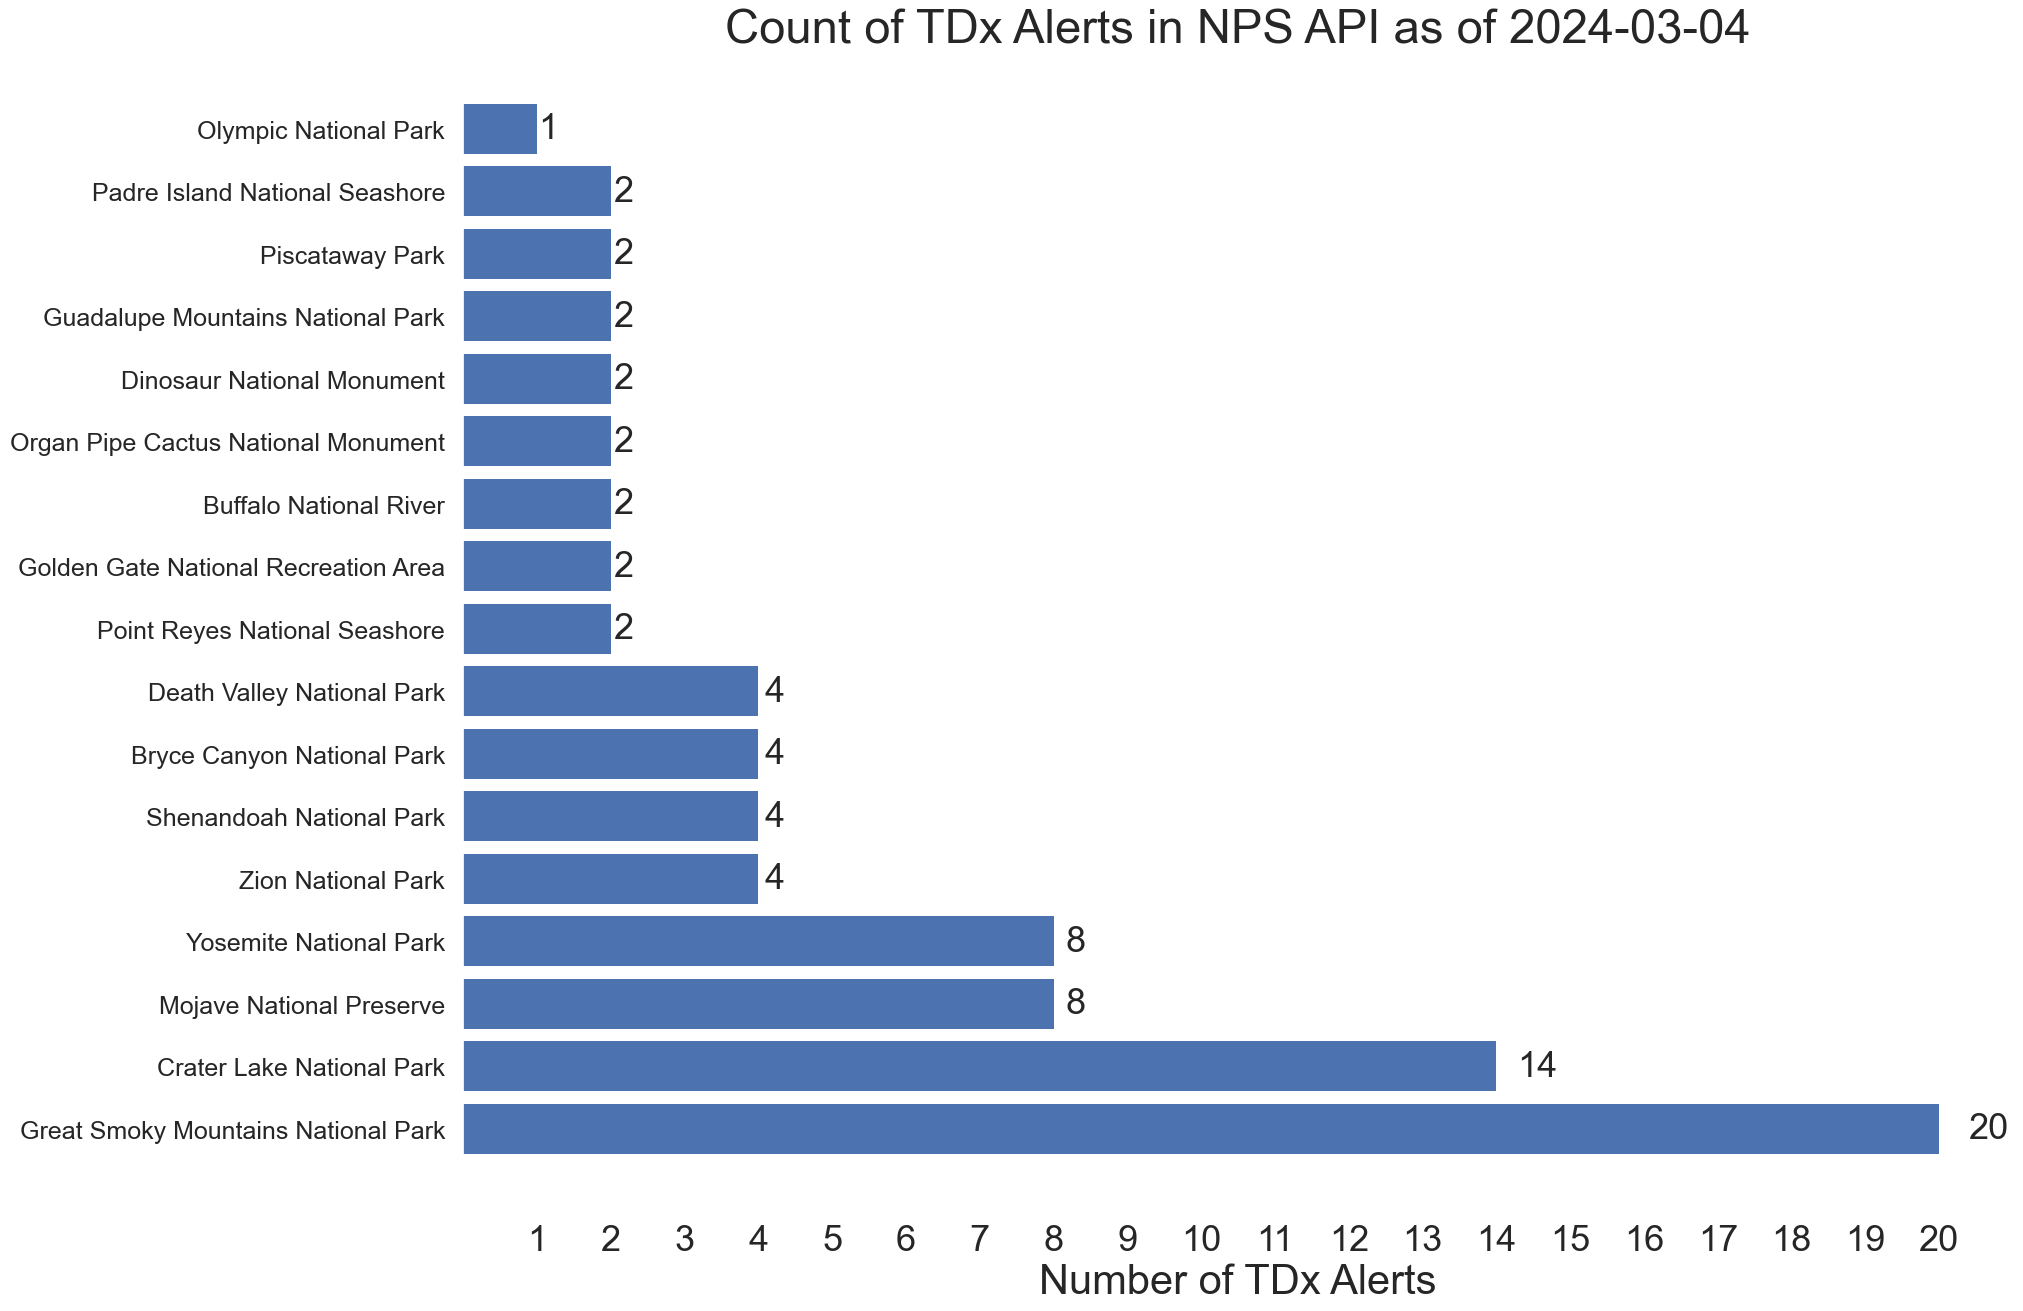

In [8]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_df['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(park_df['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [9]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  Road from Park HQ to Rim Village CLOSED
Description:  Road from park headquarters to Rim Village is temporarily closed due to the latest snowstorm.  
Event type:  incident
Road name:  ['Munson Valley Road HQ to Rim Village']
Vehicle impact:  all-lanes-closed

Park: Crater Lake National Park
Alert name:  Road from Park HQ to Rim Village CLOSED
Description:  Road from park headquarters to Rim Village is temporarily closed due to the latest snowstorm.  
Event type:  incident
Road name:  ['Munson Valley Road HQ to Rim Village']
Vehicle impact:  all-lanes-closed

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed

Park: Crater Lake National Park
Alert name:  Seasonal Road C

In [10]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
#    "event end date": end_date_list
})

In [11]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [12]:
df_update = pd.concat([df_update, df_old_update])

In [13]:
df_update.shape

(228, 9)

In [14]:
df_update.columns

Index(['date', 'park', 'alert name', 'description', 'event type', 'road name',
       'vehicle impact', 'event start date', 'event end date'],
      dtype='object')

In [15]:
df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()



,park,date,alert name,number of alerts,event type,road name,vehicle impact,event start date,event end date
0,Muir Woods National Monument,1,1,1,1,1,1,1,1
1,Big Bend National Park,2,2,2,2,2,2,2,0
2,Guadalupe Mountains National Park,4,4,4,4,4,4,4,0
3,Point Reyes National Seashore,4,4,4,4,4,4,4,0
4,Buffalo National River,4,4,4,4,4,4,4,0
5,Piscataway Park,4,4,4,4,4,4,4,0
6,Organ Pipe Cactus National Monument,4,4,4,4,4,4,4,0
7,Natchez Trace Parkway,4,4,4,4,4,4,4,4
8,Fort Point National Historic Site,5,5,5,5,5,5,5,5
9,Dinosaur National Monument,6,6,6,6,6,6,6,2


In [16]:
df_update_agg = df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()


C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_12412\429607619.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_12412\429607619.py:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


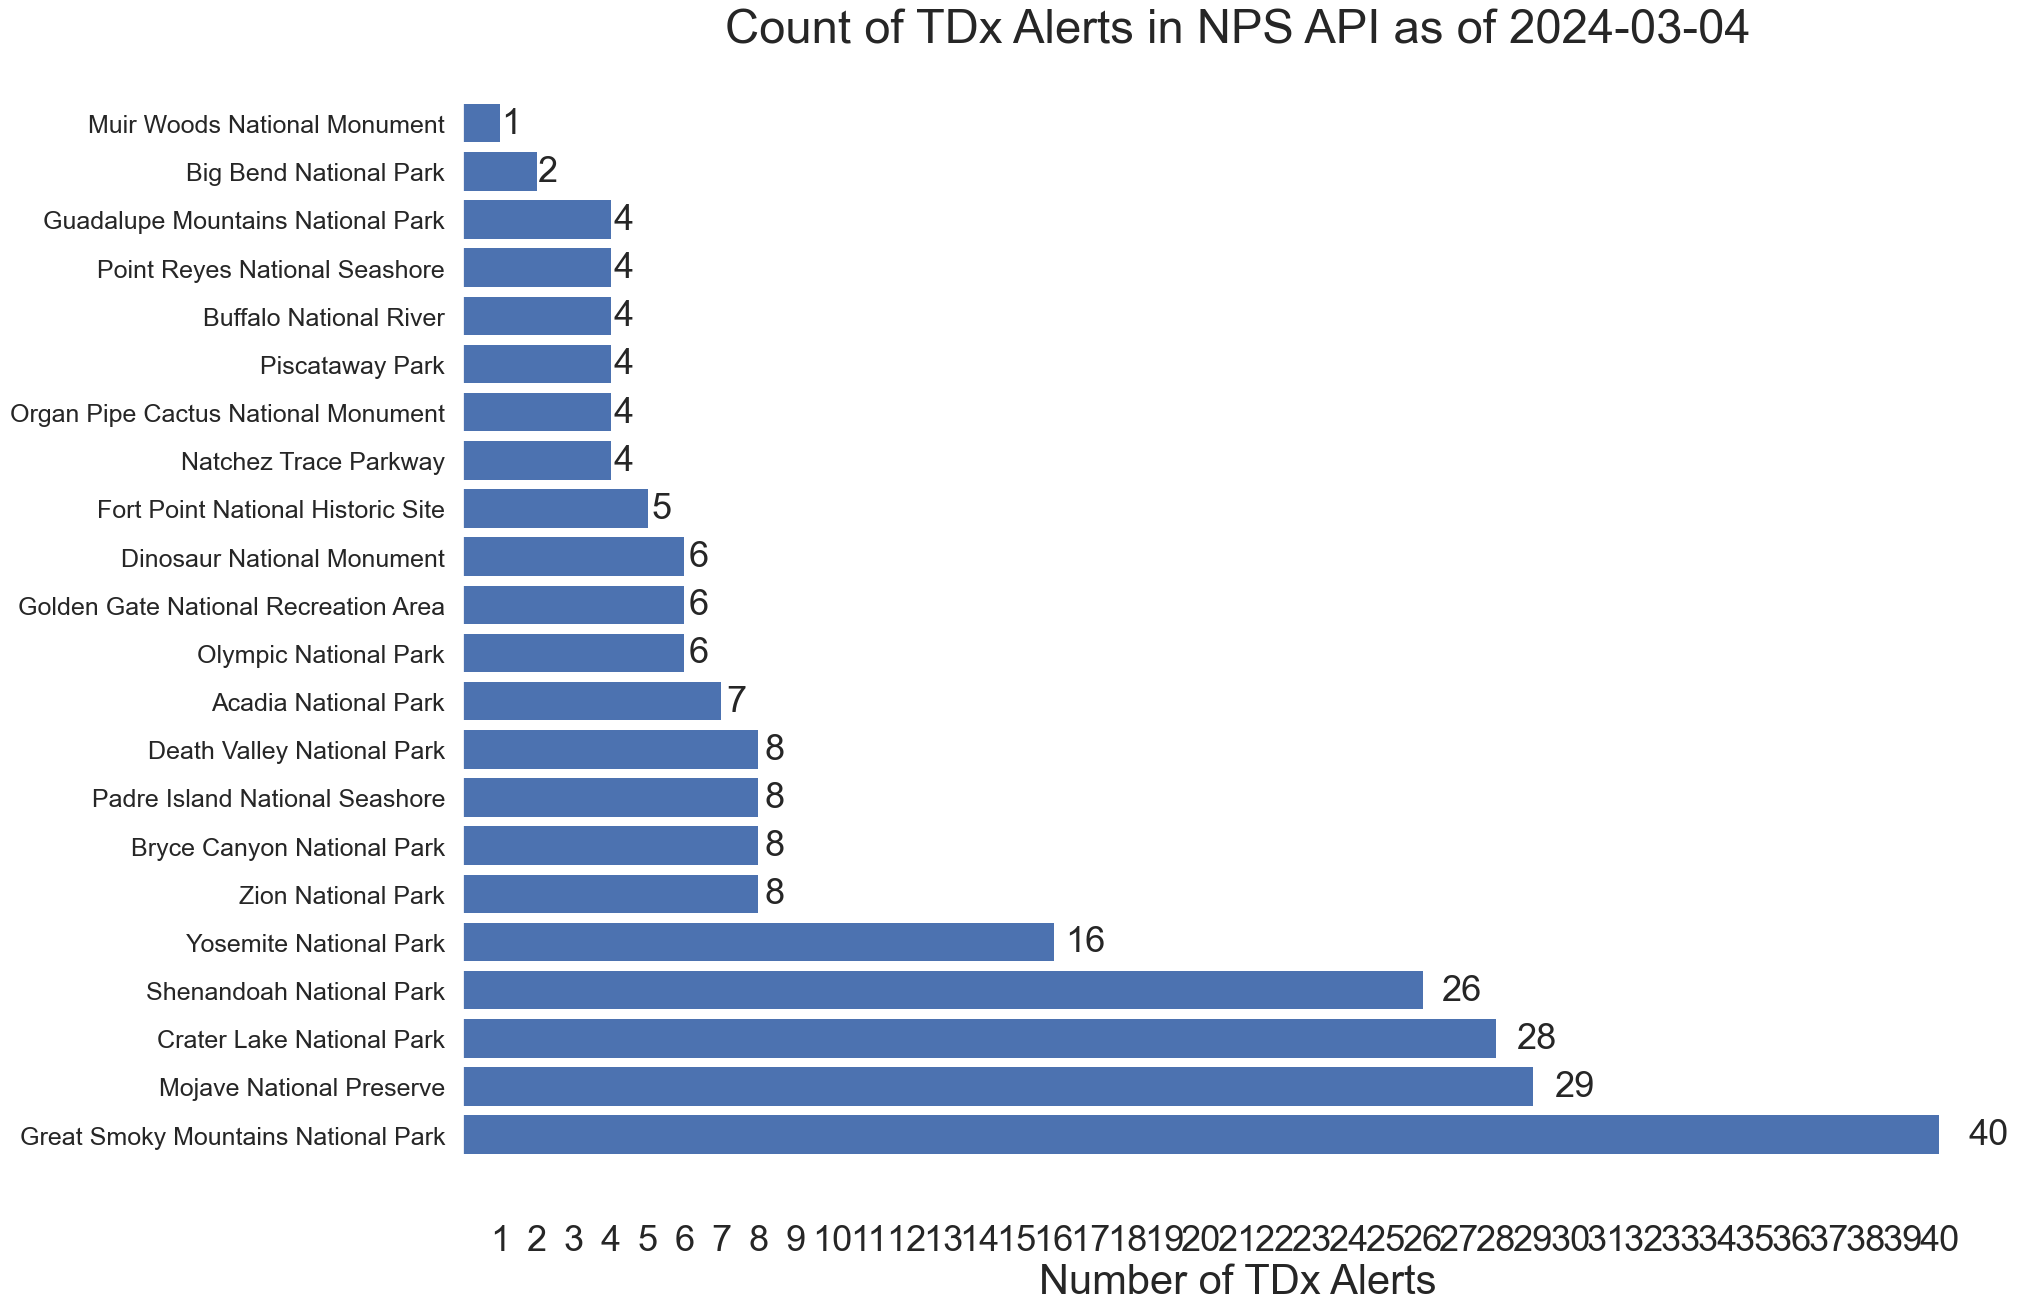

In [17]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = df_update_agg['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = df_update_agg['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(df_update_agg['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [20]:
regionlookup = pd.read_excel(r"C:\Users\Daniel.Lang\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\TDx\LookupTable.xlsx")
regionlookup.rename(columns={'NPS Full Name':"park"}, inplace = True)
regionlookup.head

<bound method NDFrame.head of                                                   park  \
0    Abraham Lincoln Birthplace National Historical...   
1                                 Acadia National Park   
2                       Adams National Historical Park   
3              African Burial Ground National Monument   
4                  Agate Fossil Beds National Monument   
..                                                 ...   
383                               World War I Memorial   
384                          Yellowstone National Park   
385                             Yosemite National Park   
386             Yukon-Charley Rivers National Preserve   
387                                 Zion National Park   

                Simplified Name Park Alpha Region  
0    Abraham Lincoln Birthplace       ABLI    SER  
1                        Acadia       ACAD    NER  
2                         Adams       ADAM    NER  
3         African Burial Ground       AFBG    NER  
4            

In [21]:
joined = pd.merge(df_update, regionlookup, on="park", how="left")
joined.head

<bound method NDFrame.head of            date                                  park  \
0    2024-03-04             Crater Lake National Park   
1    2024-03-04             Crater Lake National Park   
2    2024-03-04             Crater Lake National Park   
3    2024-03-04             Crater Lake National Park   
4    2024-03-04             Crater Lake National Park   
..          ...                                   ...   
223  2023-10-17            Dinosaur National Monument   
224  2023-10-17                 Natchez Trace Parkway   
225  2023-10-17                 Olympic National Park   
226  2023-10-17                 Olympic National Park   
227  2023-10-17  Golden Gate National Recreation Area   

                                            alert name  \
0              Road from Park HQ to Rim Village CLOSED   
1              Road from Park HQ to Rim Village CLOSED   
2                                Seasonal Road Closure   
3                                Seasonal Road Closur

In [22]:
joined.to_csv("./TDx_tracker.csv", index=False)